In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr

In [2]:
sys.path.append('..')

In [3]:
dict_regions_states = {11: 'RN',12:'RN',13:'RN',14:'RN',15:'RN',16:'RN', 17: 'RN',
                      21:'RNE',22:'RNE',23:'RNE',24:'RNE',25:'RNE',26:'RNE',27:'RNE',28:'RNE', 29:'RNE',
                      50:'RCO',51:'RCO',52:'RCO',53:'RCO',
                      31:'RSE',32:'RSE',33:'RSE',35:'RSE',
                      41:'RS',42:'RS',43:'RS'}

In [4]:
not_path = '../Data/analyzed/not_year_evo.csv'
res_path = '../Data/analyzed/res_year_evo.csv'
mun_path = '../Data/age_groups_municipalities.csv'
mun_2_path = '../Data/municipalities.csv'

df_not = pd.read_csv(not_path)
df_res = pd.read_csv(res_path)
mun_file = pd.read_csv(mun_path)
mun_2_file = pd.read_csv(mun_2_path)

In [5]:
df_not

,Unnamed: 0,ID_MUNICIP,"(0, 4]","(14, 19]","(19, 29]","(29, 39]","(39, 49]","(4, 9]","(49, 59]","(59, 69]","(69, 79]","(79, 120]","(9, 14]",TOTAL
0,0,110004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,110012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,110020,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,3,110030,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,4,110146,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,873,520870,5.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
874,874,521250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
875,875,521830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876,876,521860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
age_names = ['0 a 4',
 '5 a 9',
 '10 a 14',
 '15 a 19',
 '20 a 29',
 '30 a 39',
 '40 a 49',
 '50 a 59',
 '60 a 69',
 '70 a 79',
 '80+']

In [7]:
df_res = df_res[['Unnamed: 0','ID_MN_RESI','(0, 4]', '(4, 9]', '(9, 14]', '(14, 19]', '(19, 29]',
       '(29, 39]', '(39, 49]', '(49, 59]', '(59, 69]', '(69, 79]','(79, 120]','TOTAL']]

df_not = df_not[['Unnamed: 0','ID_MUNICIP','(0, 4]', '(4, 9]', '(9, 14]', '(14, 19]', '(19, 29]',
       '(29, 39]', '(39, 49]', '(49, 59]', '(59, 69]', '(69, 79]','(79, 120]','TOTAL']]

In [8]:
mun_2_file['municipio'] = mun_2_file['municipio'].astype(str).str[:6].astype(int)

In [9]:
mun_file = mun_file.drop(columns = ['Unnamed: 0','Total'])
mun_file = mun_file.set_index('Municipio')

## Focusing on municipality of residence - cases per capita per region

In [10]:
df_res_year = df_res.groupby(['ID_MN_RESI'])['TOTAL'].sum()
df_res_year = df_res_year.reset_index()

In [11]:
df_res_year = df_res_year.merge(mun_2_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'municipio')

In [12]:
df_res_year['REG'] = df_res_year['ID_MN_RESI'].astype(str).str[:2].astype(int)

In [13]:
df_res_year['REG'] = df_res_year['REG'].replace(dict_regions_states)

In [14]:
df_res_year = df_res_year.groupby(['REG'])[['TOTAL']].sum()
df_res_year = df_res_year.reset_index()

### Cases per 100k per region

In [15]:
mun_2_file['REG'] = mun_2_file['uf'].replace(dict_regions_states)

In [16]:
mun_2_file = mun_2_file.groupby(['REG'])['pop_21'].sum()
mun_2_file = mun_2_file.reset_index()

In [17]:
df_res_year

,REG,TOTAL
0,RCO,64.0
1,RN,15426.0
2,RNE,1994.0
3,RS,2427.0
4,RSE,21001.0


In [18]:
df_res_year['pop_21'] = mun_2_file['pop_21']

In [19]:
df_res_year['TOTAL_100'] = (df_res_year['TOTAL']/df_res_year['pop_21'])*(10**5)

In [20]:
df_res_year = df_res_year.sort_values(by = ['TOTAL_100'], ascending = False)

In [21]:
df_res_year

,REG,TOTAL,pop_21,TOTAL_100
1,RN,15426.0,18906962,81.588994
4,RSE,21001.0,89632912,23.430010
3,RS,2427.0,30402587,7.982873
2,RNE,1994.0,57667842,3.457733
0,RCO,64.0,16707336,0.383065


In [22]:
df_res_year.sort_values(by = 'pop_21', ascending = False)

,REG,TOTAL,pop_21,TOTAL_100
4,RSE,21001.0,89632912,23.430010
2,RNE,1994.0,57667842,3.457733
3,RS,2427.0,30402587,7.982873
1,RN,15426.0,18906962,81.588994
0,RCO,64.0,16707336,0.383065


In [23]:
df_res_year = df_res_year.set_index('REG')

### Focusing on municipality of residence - age cases per capita per region

In [24]:
df_res['REG'] = df_res['ID_MN_RESI'].astype(str).str[:2].astype(int)
df_res['REG'] = df_res['REG'].replace(dict_regions_states)

In [25]:
df_res = df_res.drop(columns = ['Unnamed: 0','TOTAL'])

In [26]:
df_res = df_res.groupby(['REG'])[df_res.keys()[1:-1]].sum()

In [27]:
df_res

,"(0, 4]","(4, 9]","(9, 14]","(14, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 120]"
REG,,,,,,,,,,,
RCO,17.0,2.0,0.0,7.0,25.0,4.0,7.0,2.0,0.0,0.0,0.0
RN,4643.0,759.0,773.0,2924.0,3859.0,1531.0,638.0,259.0,31.0,6.0,3.0
RNE,921.0,83.0,130.0,229.0,364.0,146.0,76.0,42.0,2.0,1.0,0.0
RS,158.0,14.0,27.0,603.0,1199.0,306.0,80.0,37.0,2.0,1.0,0.0
RSE,6965.0,559.0,409.0,2640.0,6360.0,2689.0,797.0,486.0,80.0,11.0,5.0


In [28]:
mun_file_aux = mun_file.reset_index()
mun_file_aux['REG'] = mun_file_aux['Municipio'].astype(str).str[:2].astype(int)
mun_file_aux['REG'] = mun_file_aux['REG'].replace(dict_regions_states)

In [29]:
mun_file_aux = mun_file_aux.drop(columns = ['Municipio'])

In [30]:
mun_file_aux = mun_file_aux.groupby(['REG'])[mun_file_aux.keys()[0:-1]].sum()

In [31]:
mun_file_aux.columns = df_res.columns
mun_file_aux

,"(0, 4]","(4, 9]","(9, 14]","(14, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 120]"
REG,,,,,,,,,,,
RCO,1226032,1208830,1165138,1232856,2698873,2787348,2442001,1873040,1206497,603709,263012
RN,1612740,1615768,1660080,1701691,3435178,3076517,2434930,1655930,1015420,491265,207443
RNE,4127174,4128567,4362647,4674192,9726183,9281949,7832210,6053392,4019463,2316028,1146037
RS,1977773,1954730,1855562,1994746,4667363,4718676,4196084,3816974,2882582,1579907,758190
RSE,5759550,5781470,5603730,5925925,13541427,14394893,12949641,10835620,8171936,4425999,2242721


In [32]:
df_res_year = df_res_year[['TOTAL']]

In [33]:
df_res = ((df_res/mun_file_aux))

### Plotting the results

In [34]:
df_res_names = df_res.columns

In [36]:
df_res_values = df_res.to_numpy()

In [42]:
df_br_regions = ['RCO','RN','RNE','RS','RSE']

In [43]:
df_br_cases = [64.0,15426.0,1994.0,2427.0,21001.0]

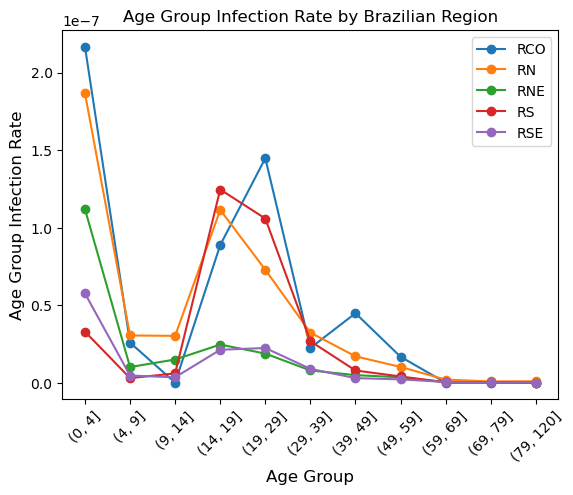

In [46]:
for i in range(5):
    plt.plot(df_res_values[i]/df_br_cases[i],'-o', label = df_br_regions[i])
    
    
plt.title('Age Group Infection Rate by Brazilian Region')
x_ticks = np.arange(0,len(df_res_names),1)
plt.xticks(x_ticks, df_res_names, rotation = 45,fontsize = 10)
plt.xlabel('Age Group',fontsize =12)
plt.ylabel('Age Group Infection Rate',fontsize =12)
plt.legend()
plt.show()